In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df1=df.drop('children',axis=1) #drop irrelevent column

In [7]:
df1.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


# Outlier treatment

<AxesSubplot:>

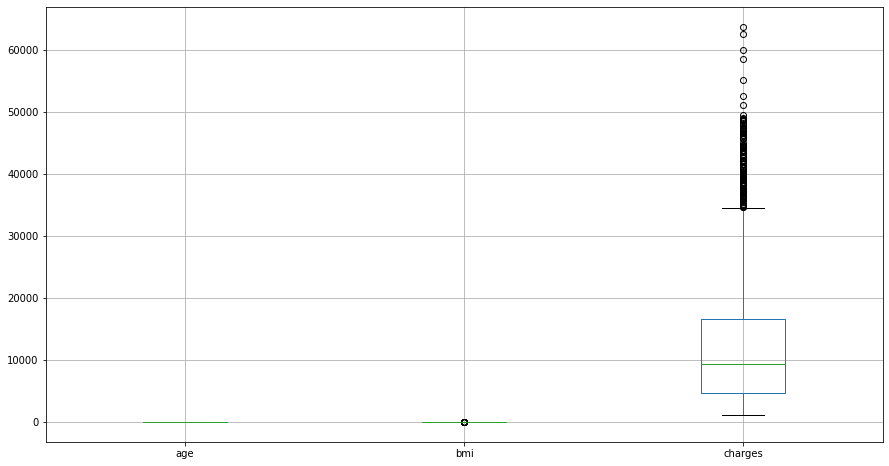

In [106]:
plt.figure(figsize=(15,8))
df1.boxplot()

<AxesSubplot:>

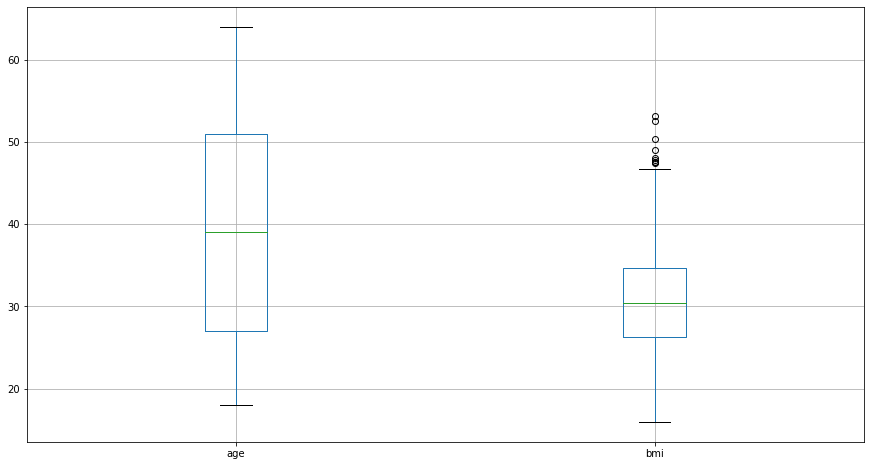

In [107]:
plt.figure(figsize = (15,8))
df1.loc[:,['age','bmi']].boxplot()

C:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

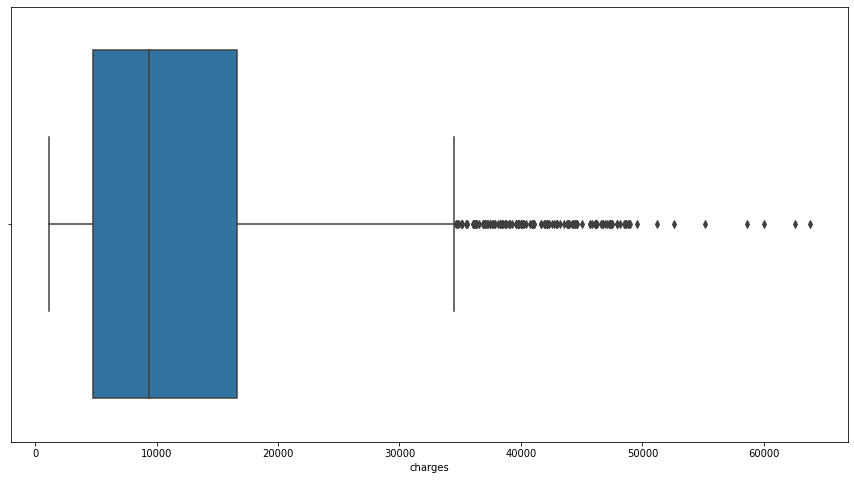

In [108]:
plt.figure(figsize=(15,8))
sns.boxplot(df['charges'])

In [109]:
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
print(IQR)
LE=Q1-1.5*IQR
UE=Q3+1.5*IQR
df1 = df1[~((df1 < LE) | (df1 > UE)).any(axis=1)]
df1.shape
#df1=df1[~(df1<LE) | (df1>UE).any(axis=1)]
#df1.shape

age           24.000000
bmi            8.397500
charges    11899.625365
dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_17176\391713275.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1 < LE) | (df1 > UE)).any(axis=1)]


(1193, 6)

# missing value treatment

In [12]:
Total = df1.isnull().sum().sort_values(ascending=False)          
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
age,0,0.0
sex,0,0.0
bmi,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


# scale data

In [110]:
df1.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


In [128]:
df1.iloc[:, [0,2,5]] = df1.iloc[:,[0,2,5]].apply(lambda rec: (rec - rec.mean()) / rec.std())

df1.head()

,age,sex,bmi,smoker,region,charges
0,-1.420812,female,-0.357691,yes,southwest,0.957432
1,-1.491918,male,0.642842,no,southeast,-1.133133
2,-0.780856,male,0.511596,no,southeast,-0.757490
3,-0.425326,male,-1.243171,no,northwest,1.660689
4,-0.496432,male,-0.190652,no,northwest,-0.837835


### Filter numerical and categorical variables

In [111]:
df1_feature=df1.drop('charges',axis=1)
df1_target=df1['charges']

In [112]:
df1_num=df1_feature.select_dtypes(include=[np.number])
df1_num.columns

Index(['age', 'bmi'], dtype='object')

In [113]:
df1_cat=df1_feature.select_dtypes(include=[np.object])
df1_cat.columns

C:\Users\Dell\AppData\Local\Temp\ipykernel_17176\1380481746.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df1_cat=df1_feature.select_dtypes(include=[np.object])


Index(['sex', 'smoker', 'region'], dtype='object')

# Encode data

In [114]:
encode_data=pd.get_dummies(data=df1_cat,drop_first=True)

In [115]:
encode_data.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


 # Concatenate numerical and dummy encoded categorical variables.

In [116]:
df1_dummy=pd.concat([df1_num,encode_data],axis=1)
df1_dummy.head()

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,0,1,0
2,28,33.000,1,0,0,1,0
3,33,22.705,1,0,1,0,0
4,32,28.880,1,0,1,0,0


In [117]:
df1_dummy.isnull().sum()

age                 0
bmi                 0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

# Split the data into training and test sets.

In [129]:
X_full = df1_dummy.copy()
y_full = df1_target.copy()
X_full = sm.add_constant(X_full)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (835, 8)
y_train_full (835,)
X_test_full (358, 8)
y_test_full (358,)


# Base model

In [130]:
MLR_base_model=sm.OLS(y_train_full,X_train_full).fit()

In [131]:
print(MLR_base_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     194.0
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          1.15e-169
Time:                        00:07:30   Log-Likelihood:                -734.61
No. Observations:                 835   AIC:                             1485.
Df Residuals:                     827   BIC:                             1523.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.8359      0.126  

# R-Squared

In [132]:
round(MLR_base_model.rsquared,3)

0.621

# Adj-Rsquared

In [133]:
round(MLR_base_model.rsquared_adj,2)

0.62

# Model performence

In [134]:
from sklearn.metrics import mean_squared_error

In [135]:
train_predict=MLR_base_model.predict(X_train_full)
train_predict

303    -0.627536
1269   -0.210237
67     -0.228332
1221   -0.398891
1280    0.024060
          ...   
800    -0.263546
1010   -0.119746
1228    0.242538
268    -0.174960
1190   -0.380398
Length: 835, dtype: float64

In [136]:
test_predict=MLR_base_model.predict(X_test_full)
test_predict

60     -0.141535
858    -0.734689
531     0.585289
1140    0.082847
900    -0.010654
          ...   
378     0.652866
876    -0.031200
11      2.445628
757     1.980287
1048   -0.708638
Length: 358, dtype: float64

In [137]:
# MASE (mean square error)
#for traning data
round(mean_squared_error(y_train_full,train_predict))

0

In [138]:
#for testing data
round(mean_squared_error(y_test_full,test_predict))# that means model over fit  i.e error high
#when we apply train model in train set model working file(mse=0 after that when we apply that model are testing data
#error was 1(mse=1)so, because of that we concluse model is overfiting(error more) ) 

1

In [139]:
# MAE
#for train data
from sklearn.metrics import mean_absolute_error
round(mean_absolute_error(y_train_full,train_predict))

0

In [33]:
#for test data
round(mean_absolute_error(y_test_full,test_predict))

0

In [140]:
#root mean square
rmse=np.sqrt(mean_squared_error(y_train_full,train_predict))
round(rmse,2)

0.58

In [141]:
rmse=np.sqrt(mean_squared_error(y_test_full,test_predict))
round(rmse,2)

0.74

# VIF

In [152]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
df_numeric=X_full

In [154]:
df_numeric.shape

(1193, 8)

In [155]:
df_numeric.head()


,const,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,19,27.900,0,1,0,0,1
1,1.0,18,33.770,1,0,0,1,0
2,1.0,28,33.000,1,0,0,1,0
3,1.0,33,22.705,1,0,1,0,0
4,1.0,32,28.880,1,0,1,0,0


In [156]:
#find the feature importance using vif
for ind in range(len(df_numeric.columns)):
    #make new dataframe for vif
    vif=pd.DataFrame()
    #find vif
    vif['vif_factor']=[variance_inflation_factor(df_numeric.values,i) for i in range(df_numeric.shape[1])]
    vif['features']=df_numeric.columns
    #set the thresold for vif(higher the vif-less contribution,lessabsvif-higher contribution)
    multi=vif[vif['vif_factor']>10]
    #sort the vif in desecnding order
    if (multi.empty==False):
        df_sorted=multi.sort_values(by='vif_factor',ascending=False)
    else:
        print(vif)
        break
        #drop those column present in df_sorted from df_numeric
    if(df_sorted.empty==False):
        df_numeric=df_numeric.drop(df_sorted.features.iloc[0],axis=1)
        
        print(vif)
        break
#now we can use only these columns and drop remaining

   vif_factor          features
0   38.375307             const
1    1.019350               age
2    1.161128               bmi
3    1.001324          sex_male
4    1.077153        smoker_yes
5    1.514294  region_northwest
6    1.596661  region_southeast
7    1.515762  region_southwest


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_model=lr.fit(X_train_full,y_train_full) #2nd OLS model data
round(lr_model.score(X_train_full,y_train_full),2) #accuracy

In [149]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
def get_score(lr,X_train_full,X_test_full,y_train_full,y_test_full):
    lr.fit(X_train,y_train)
    return lr.score(X_test,y_test)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=LinearRegression(),X=X_train_full,y=y_train_full,cv=10,scoring='r2')#r-squared
scores
print(max(score),min(score))

0.914621598768719 0.10713132111109502


In [41]:
# before and after vif same so we use cross validation

# cross validation

In [150]:
#sqrt trasformation
df2=df.drop('children',axis=1)
df_sqrt_num=df2.select_dtypes(include=[np.number])
df_sqrt_num.head()

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520


In [163]:
df_new_num=np.sqrt(df_sqrt_num)
df_new_num.head()

,age,bmi,charges
0,4.358899,5.282045,129.942002
1,4.242641,5.811196,41.539768
2,5.291503,5.744563,66.704288
3,5.744563,4.764976,148.271611
4,5.656854,5.374012,62.184043


In [164]:
df_sqrt_cat=df.select_dtypes(include=[np.object])
df_sqrt_cat

C:\Users\Dell\AppData\Local\Temp\ipykernel_17176\351228692.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_sqrt_cat=df.select_dtypes(include=[np.object])


,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [165]:
encoded_data = pd.get_dummies(data = df_sqrt_cat, drop_first=True)

In [167]:
df_dummy_new_sqrt = pd.concat([df_new_num,encoded_data], axis=1)
df_dummy_new_sqrt.head()

,age,bmi,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,4.358899,5.282045,129.942002,0,1,0,0,1
1,4.242641,5.811196,41.539768,1,0,0,1,0
2,5.291503,5.744563,66.704288,1,0,0,1,0
3,5.744563,4.764976,148.271611,1,0,1,0,0
4,5.656854,5.374012,62.184043,1,0,1,0,0


In [168]:
# Find wether this trasformation are usefull for our model or not using cross validation (KFold validation)
df_dummy_new_sqrt.drop('charges',inplace=True,axis=1)
df_dummy_new_sqrt

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,4.358899,5.282045,0,1,0,0,1
1,4.242641,5.811196,1,0,0,1,0
2,5.291503,5.744563,1,0,0,1,0
3,5.744563,4.764976,1,0,1,0,0
4,5.656854,5.374012,1,0,1,0,0
...,...,...,...,...,...,...,...
1333,7.071068,5.565070,1,0,1,0,0
1334,4.242641,5.649779,0,0,0,0,0
1335,4.242641,6.070420,0,0,0,1,0
1336,4.582576,5.079370,0,0,0,0,1


In [169]:
df_target=df.charges.copy()
#df_target

In [170]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'

X_full = df_dummy_new_sqrt.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (936, 8)
y_train_full (936,)
X_test_full (402, 8)
y_test_full (402,)


In [171]:
# First model so, we do OLS
mlr_model_sqrt_new=sm.OLS(y_train_full,X_train_full).fit()

In [172]:
mlr_model_sqrt_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     399.6
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          5.92e-275
Time:                        00:24:15   Log-Likelihood:                -9484.0
No. Observations:                 936   AIC:                         1.898e+04
Df Residuals:                     928   BIC:                         1.902e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.933e+04   2219.331    -13.218      0.000   -3.37e+04    -2.5e+04
age               3005.2112    174.838     17.189      0.000    2662.088    3348.334
bmi               3614.5913    381.090      9.485      0.000    2866.692    4362.490
sex_male          -269.1170    401.219     -0.671      0.503   -1056.518     518.284
smoker_yes        2.406e+04    495.403     48.558      0.000    2.31e+04     2.5e+04
region_northwest  -294.1933    578.569     -0.508      0.611   -1429.649     841.262
region_southeast  -933.5243    581.338     -1.606      0.109   -2074.413     207.364
region_southwest  -852.1250    570.548     -1.494      0.136   -1971.839     267.589
==============================================================================
Omnibus:                      202.670   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.739
Skew:                           1.170   Prob(JB):                    1.21e-101
Kurtosis:                       5.538   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(),X_train_full,y_train_full,cv=50,scoring='r2')
score

array([0.60945706, 0.77284903, 0.65126347, 0.79697335, 0.59121678,
       0.83452877, 0.85523971, 0.759462  , 0.60799931, 0.06895721,
       0.74957471, 0.87864576, 0.88002905, 0.72849907, 0.78559947,
       0.65406213, 0.22669058, 0.84301972, 0.30580405, 0.88247388,
       0.53174542, 0.71492484, 0.67861001, 0.68993035, 0.7643595 ,
       0.48154203, 0.78396024, 0.72929005, 0.69840358, 0.80786099,
       0.44935525, 0.80549324, 0.82843437, 0.67230522, 0.82108573,
       0.76723028, 0.61134328, 0.43546804, 0.70236281, 0.84929665,
       0.80469814, 0.84229934, 0.48246179, 0.81228549, 0.80712151,
       0.85239598, 0.84472146, 0.83662293, 0.90835361, 0.63690824])

In [174]:
print("maximum R-squared we got is",max(score))
round(max(score),2)

maximum R-squared we got is 0.9083536137714664


0.91

In [175]:
print("minimum R-squared we got is",min(score)) #data is not true min max very difference
round(min(score),2)

minimum R-squared we got is 0.06895720955397744


0.07

# leave one out CV

In [176]:
loocv_rmse=[]
from sklearn.model_selection import LeaveOneOut
loocv=LeaveOneOut()
for train_index,test_index in loocv.split(X_train_full):
    X_train_l,X_test_l,y_train_l,y_test_l=(X_train_full.iloc[train_index],
                                          X_train_full.iloc[test_index],
                                          y_train_full.iloc[train_index],
                                          y_train_full.iloc[test_index])

# instantiate the regression model    
linreg2=LinearRegression()

#fit the model on training dataset
linreg2.fit(X_train_l,y_train_l)

#mse
mse=mean_squared_error(y_test_l,linreg2.predict(X_test_l))

rmse=np.sqrt(mse)
loocv_rmse.append(rmse)
print(loocv_rmse)

[298.7674210791938]


In [213]:
# 2)log transformation
df_new_num_log=np.log(df_sqrt_num)
df_new_num_log.head()

,age,bmi,charges
0,2.944439,3.328627,9.734176
1,2.890372,3.519573,7.453302
2,3.332205,3.496508,8.400538
3,3.496508,3.122585,9.998092
4,3.465736,3.363149,8.260197


In [214]:
encoded_data = pd.get_dummies(data = df_sqrt_cat, drop_first=True)
encoded_data.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [215]:
df_log_dummy=pd.concat([df_new_num_log,encoded_data],axis=1)
df_log_dummy.drop('charges',inplace=True,axis=1)
df_log_dummy.head()


,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,2.944439,3.328627,0,1,0,0,1
1,2.890372,3.519573,1,0,0,1,0
2,3.332205,3.496508,1,0,0,1,0
3,3.496508,3.122585,1,0,1,0,0
4,3.465736,3.363149,1,0,1,0,0


In [216]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'

X_full = df_log_dummy.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (936, 8)
y_train_full (936,)
X_test_full (402, 8)
y_test_full (402,)


In [217]:
# First model so, we do OLS
mlr_model1_log_new=sm.OLS(y_train_full,X_train_full).fit()

In [218]:
mlr_model1_log_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     391.5
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          7.22e-272
Time:                        00:40:08   Log-Likelihood:                -9491.2
No. Observations:                 936   AIC:                         1.900e+04
Df Residuals:                     928   BIC:                         1.904e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.585e+04   3765.430    -14.833      0.000   -6.32e+04   -4.85e+04
age               8637.3709    520.707     16.588      0.000    7615.470    9659.271
bmi               9952.4717   1046.161      9.513      0.000    7899.356     1.2e+04
sex_male          -270.1787    404.302     -0.668      0.504   -1063.631     523.273
smoker_yes        2.405e+04    499.218     48.185      0.000    2.31e+04     2.5e+04
region_northwest  -346.0931    583.133     -0.594      0.553   -1490.505     798.319
region_southeast  -910.6390    585.218     -1.556      0.120   -2059.143     237.865
region_southwest  -884.9416    575.115     -1.539      0.124   -2013.619     243.736
==============================================================================
Omnibus:                      197.723   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.340
Skew:                           1.153   Prob(JB):                     8.86e-97
Kurtosis:                       5.454   Cond. No.                         98.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(),X_train_full,y_train_full,cv=50,scoring='r2')
print(max(score),min(score))

0.9011581677935324 0.029469711518153807


In [220]:
loocv_rmse=[]
from sklearn.model_selection import LeaveOneOut
loocv=LeaveOneOut()
for train_index,test_index in loocv.split(X_train_full):
    X_train_l,X_test_l,y_train_l,y_test_l=(X_train_full.iloc[train_index],
                                          X_train_full.iloc[test_index],
                                          y_train_full.iloc[train_index],
                                          y_train_full.iloc[test_index])

# instantiate the regression model    
linreg2=LinearRegression()

#fit the model on training dataset
linreg2.fit(X_train_l,y_train_l)

#mse
mse=mean_squared_error(y_test_l,linreg2.predict(X_test_l))

rmse=np.sqrt(mse)
loocv_rmse.append(rmse)
print(loocv_rmse)

[528.0928706569848]


In [185]:
# 3)inverse transformation
df_new_num_inv=1/(df_sqrt_num)
df_new_num_inv.head()

,age,bmi,charges
0,0.052632,0.035842,0.000059
1,0.055556,0.029612,0.000580
2,0.035714,0.030303,0.000225
3,0.030303,0.044043,0.000045
4,0.031250,0.034626,0.000259


In [205]:
df_dummy_new_inv = pd.concat([df_new_num_inv,encoded_data], axis=1)
df_dummy_new_inv.drop('charges',axis=1,inplace=True)
df_dummy_new_inv.head()

,age,bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0.052632,0.035842,0,1,0,0,1
1,0.055556,0.029612,1,0,0,1,0
2,0.035714,0.030303,1,0,0,1,0
3,0.030303,0.044043,1,0,1,0,0
4,0.031250,0.034626,1,0,1,0,0


In [206]:
df_dummy_new_inv.shape

(1338, 7)

In [207]:
df_target.shape

(1338,)

In [208]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'

X_full = df_dummy_new_inv.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (936, 8)
y_train_full (936,)
X_test_full (402, 8)
y_test_full (402,)


In [209]:
# First model so, we do OLS
mlr_model_inv_new=sm.OLS(y_train_full,X_train_full).fit()

In [210]:
mlr_model_inv_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     369.9
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          2.06e-263
Time:                        00:38:13   Log-Likelihood:                -9510.8
No. Observations:                 936   AIC:                         1.904e+04
Df Residuals:                     928   BIC:                         1.908e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.638e+04   1251.163     21.088      0.000    2.39e+04    2.88e+04
age              -2.561e+05    1.7e+04    -15.067      0.000   -2.89e+05   -2.23e+05
bmi              -2.857e+05   3.04e+04     -9.398      0.000   -3.45e+05   -2.26e+05
sex_male          -270.7540    412.875     -0.656      0.512   -1081.030     539.522
smoker_yes        2.405e+04    509.820     47.170      0.000     2.3e+04     2.5e+04
region_northwest  -442.7493    595.780     -0.743      0.458   -1611.983     726.484
region_southeast  -843.1385    596.121     -1.414      0.158   -2013.040     326.763
region_southwest  -934.0765    587.572     -1.590      0.112   -2087.200     219.047
==============================================================================
Omnibus:                      183.263   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.851
Skew:                           1.100   Prob(JB):                     2.70e-84
Kurtosis:                       5.242   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LinearRegression(),X_train_full,y_train_full,cv=50,scoring='r2')
print(max(score),min(score))

0.8858459560092654 -0.04336639015250343


In [212]:
loocv_rmse=[]
from sklearn.model_selection import LeaveOneOut
loocv=LeaveOneOut()
for train_index,test_index in loocv.split(X_train_full):
    X_train_l,X_test_l,y_train_l,y_test_l=(X_train_full.iloc[train_index],
                                          X_train_full.iloc[test_index],
                                          y_train_full.iloc[train_index],
                                          y_train_full.iloc[test_index])

# instantiate the regression model    
linreg2=LinearRegression()

#fit the model on training dataset
linreg2.fit(X_train_l,y_train_l)

#mse
mse=mean_squared_error(y_test_l,linreg2.predict(X_test_l))

rmse=np.sqrt(mse)
loocv_rmse.append(rmse)
print(loocv_rmse)

[1007.3825511326049]
